In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 60)
bpi2015= []
for c in range(5):
    bpi2015.append(pd.read_csv("bpi2015_"+str(c+1)+".csv", low_memory=False))
    print(bpi2015[c].shape)
    print(bpi2015[c].columns)
    

(52217, 29)
Index(['case', 'event', 'startTime', 'completeTime', 'termName', 'startDate',
       'caseProcedure', 'Responsible_actor', 'caseStatus', 'Includes_subCases',
       'endDatePlanned', 'endDate', 'parts', 'requestComplete', 'last_phase',
       'landRegisterID', 'SUMleges', 'case_type', 'IDofConceptCase',
       'org:resource', 'activityNameEN', 'action_code', 'activityNameNL',
       'planned', 'dateStop', 'dateFinished', 'question', 'dueDate',
       'monitoringResource'],
      dtype='object')
(44354, 28)
Index(['case', 'event', 'startTime', 'completeTime', 'termName', 'startDate',
       'caseProcedure', 'Responsible_actor', 'caseStatus', 'Includes_subCases',
       'requestComplete', 'endDate', 'parts', 'last_phase', 'landRegisterID',
       'SUMleges', 'case_type', 'IDofConceptCase', 'activityNameEN',
       'org:resource', 'action_code', 'activityNameNL', 'planned', 'dateStop',
       'dateFinished', 'question', 'dueDate', 'monitoringResource'],
      dtype='object')
(

# Preprocessing
Starts the preprocessing to remove null values in the 5 datasets

In [2]:
for c in bpi2015:
    print(np.all(c.startTime == c.completeTime))

True
True
True
True
True


In [3]:
pd.concat([c.isnull().sum() for c in bpi2015], axis=1)


/Users/resinas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,0,1,2,3,4
IDofConceptCase,16381,27266.0,24639,19401,26240
Includes_subCases,11280,10701.0,14066,7819,15027
Responsible_actor,19,0.0,0,0,0
SUMleges,8632,11806.0,20506,9081,8409
action_code,0,1.0,0,1,5
activityNameEN,0,0.0,0,0,0
activityNameNL,0,0.0,0,0,0
case,0,0.0,0,0,0
caseProcedure,46538,30728.0,51567,40434,52791
caseStatus,0,0.0,0,0,0


In [4]:
bpi2015[0][['termName', 'caseProcedure', 'Responsible_actor', 'caseStatus', 'Includes_subCases', 'parts', 'landRegisterID']].dtypes

termName              object
caseProcedure         object
Responsible_actor    float64
caseStatus            object
Includes_subCases     object
parts                 object
landRegisterID       float64
dtype: object

In [5]:
for c in bpi2015:
    c.loc[:,['termName', 'caseProcedure','caseStatus', 'Includes_subCases', 'parts']] = c.loc[:,['termName', 'caseProcedure','caseStatus', 'Includes_subCases', 'parts']].fillna('NA')

In [6]:
print(np.any(pd.concat([c['Responsible_actor'].value_counts() for c in bpi2015], axis=1) == 0))
print(np.any(pd.concat([c['landRegisterID'].value_counts() for c in bpi2015], axis=1) == 0))

False
False


In [7]:
for c in bpi2015:
    c.loc[:,['Responsible_actor', 'landRegisterID']] = c.loc[:,['Responsible_actor', 'landRegisterID']].fillna(0)

In [8]:
print(np.any(pd.concat([c['SUMleges'].value_counts() for c in bpi2015], axis=1) == 0))

False


In [9]:
for c in bpi2015:
    c.loc[:,['SUMleges']] = c.loc[:,['SUMleges']].fillna(0)

In [10]:
for c in bpi2015:
    c['HasConceptCase'] = ~c['IDofConceptCase'].isnull()

In [11]:
pd.concat([c.isnull().sum() for c in bpi2015], axis=1)

/Users/resinas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,0,1,2,3,4
HasConceptCase,0,0.0,0,0,0
IDofConceptCase,16381,27266.0,24639,19401,26240
Includes_subCases,0,0.0,0,0,0
Responsible_actor,0,0.0,0,0,0
SUMleges,0,0.0,0,0,0
action_code,0,1.0,0,1,5
activityNameEN,0,0.0,0,0,0
activityNameNL,0,0.0,0,0,0
case,0,0.0,0,0,0
caseProcedure,0,0.0,0,0,0


In [12]:
pd.concat([c.nunique() for c in bpi2015], axis=1)

/Users/resinas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,0,1,2,3,4
HasConceptCase,2,2.0,2,2,2
IDofConceptCase,810,310.0,804,621,637
Includes_subCases,3,3.0,3,3,3
Responsible_actor,21,7.0,20,9,8
SUMleges,613,363.0,533,476,565
action_code,397,408.0,383,354,385
activityNameEN,289,304.0,277,272,285
activityNameNL,289,304.0,277,272,285
case,1199,832.0,1409,1053,1156
caseProcedure,3,3.0,3,3,3


# Encoding the datasets

In [13]:
import EventLog as el
logs = [el.EventLog(c, 'case', 'completeTime') for c in bpi2015]

Found False
Found False
Found False
Found False
Found False


In [15]:
from sklearn.preprocessing import OneHotEncoder

encoder = el.LogEncoder(transformers = [('static_drop', 'drop', ['case_type', 'startDate', 'endDate', 'endDatePlanned', 'last_phase', 'IDofConceptCase']),
                                     ('static_keep', 'keep', ['requestComplete', 'HasConceptCase']),
                                     ('static_onehot', el.WrapperEncoder(logs[0].id_column,OneHotEncoder(sparse=False)), ['termName', 'caseProcedure', 'Responsible_actor', 'caseStatus', 'Includes_subCases', 'parts', 'landRegisterID']),
                                     ('dynamic_drop', 'drop', ['action_code', 'activityNameNL', 'planned', 'dateStop', 'dateFinished', 'dueDate', 'question']),
                                     ('dynamic_keep', 'keep', ['SUMleges']),
                                     ('dynamic_freq', el.FrequencyEncoder(logs[0].id_column), ['event', 'org:resource', 'activityNameEN','monitoringResource']),
                                     ('timestamp', el.TimestampFeatures(logs[0].id_column, ['event_order', 'time_from_start', 'elapsed_time_from_event']), [logs[0].timestamp_column])])


encoder.check_unused(logs[0])

['case', 'startTime']

In [16]:
datasets = [encoder.fit_transform(l) for l in logs]

Fitting static_drop
Fitting static_keep
Fitting static_onehot
Fitting dynamic_drop
Fitting dynamic_keep
Fitting dynamic_freq
Fitting timestamp
Transforming static_drop
Transforming static_keep
Transforming static_onehot
Transforming dynamic_drop
Transforming dynamic_keep
Transforming dynamic_freq
Transforming timestamp
Fitting static_drop
Fitting static_keep
Fitting static_onehot
Fitting dynamic_drop
Fitting dynamic_keep
Fitting dynamic_freq
Fitting timestamp
Transforming static_drop
Transforming static_keep
Transforming static_onehot
Transforming dynamic_drop
Transforming dynamic_keep
Transforming dynamic_freq
Transforming timestamp
Fitting static_drop
Fitting static_keep
Fitting static_onehot
Fitting dynamic_drop
Fitting dynamic_keep
Fitting dynamic_freq
Fitting timestamp
Transforming static_drop
Transforming static_keep
Transforming static_onehot
Transforming dynamic_drop
Transforming dynamic_keep
Transforming dynamic_freq
Transforming timestamp
Fitting static_drop
Fitting static_ke

In [17]:
[(dataset.isnull().sum() > 0).sum() for dataset in datasets]

[0, 0, 0, 0, 0]

Here we compute the target for the prediction

In [19]:
y = []
for log in logs:
    mask_scr = log.df['activityNameEN'] == 'send confirmation receipt'
    mask_rmd = log.df['activityNameEN'] == 'retrieve missing data'
    event_order = log.df.groupby(log.id_column).cumcount()
    rmd = pd.concat([event_order[mask_rmd], log.df[log.id_column]], axis=1).groupby('case').transform('max')
    scr = pd.concat([event_order[mask_scr], log.df[log.id_column]], axis=1).groupby('case').transform('max')
    y.append(~(scr.isnull() | (rmd > scr))[0])
    
X = [el.transform_timedeltas(dataset) for dataset in datasets]


In [21]:
[logs[i].df.loc[y[i], logs[i].id_column].nunique() for i in range(0,5)]

[879, 643, 1131, 792, 779]

We first make sure that the shapes of X and y look nice

In [22]:
[(X[i].shape, y[i].shape) for i in range(5)]

[((52217, 1016), (52217,)),
 ((44354, 1033), (44354,)),
 ((59681, 1045), (59681,)),
 ((47293, 826), (47293,)),
 ((59083, 1710), (59083,))]

# Experiments

In [31]:
from splitters import TimeCaseSplit

def print_split(splitter):
    for i in range(5):
        print('Dataset '+str(i))
        prev_ti = None
        count_train = 0
        count_test = 0
        for _,_,ti,ts in splitter.split(X[i],y[i],logs[i].df[logs[i].id_column], logs[i].df[logs[i].timestamp_column]):
            if prev_ti != ti:
                print('Train ' + str(count_train) + ' has '+ str(count_test))
                prev_ti = ti
                count_test = 0
                count_train = count_train + 1
            
            count_test = count_test + 1

In [32]:
print_split(TimeCaseSplit(train_size=pd.DateOffset(months=6), train_freq=pd.DateOffset(months=6), test_freq=pd.DateOffset(months=6), test_periods=50, threshold=60, sliding=True))

Dataset 0
Train 0 has 0
Train 1 has 8
Train 2 has 7
Train 3 has 6
Train 4 has 5
Train 5 has 4
Train 6 has 3
Train 7 has 2
Dataset 1
Train 0 has 0
Train 1 has 7
Train 2 has 6
Train 3 has 5
Train 4 has 4
Train 5 has 3
Dataset 2
Train 0 has 0
Train 1 has 8
Train 2 has 7
Train 3 has 6
Train 4 has 5
Train 5 has 4
Train 6 has 3
Train 7 has 2
Dataset 3
Train 0 has 0
Train 1 has 7
Train 2 has 6
Train 3 has 5
Train 4 has 3
Train 5 has 2
Dataset 4
Train 0 has 0
Train 1 has 8
Train 2 has 7
Train 3 has 6
Train 4 has 5
Train 5 has 4
Train 6 has 3
Train 7 has 2


## RQ1: Does the dataset change over time?

In [24]:
catcols = set(X[0].columns.values) - set(['SUMleges','event_order_completeTime', 'time_from_start_completeTime', 'elapsed_time_from_event_completeTime'])

In [39]:
from splitters import TimeCaseSplit
from contingency import compute_all_chi2

allchi2 = []
for i in range(5):
    tcs = TimeCaseSplit(train_size=pd.DateOffset(months=6), train_freq=pd.DateOffset(months=6), test_freq=pd.DateOffset(months=6), test_periods=50, threshold=60, sliding=True)
    allchi2.append(compute_all_chi2(X[i].loc[:,catcols], tcs.split(X[i],y[i],logs[i].df[logs[i].id_column], logs[i].df[logs[i].timestamp_column])))

/Users/resinas/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
def draw_heatmap(data):
    s = len(data.columns)+1
    yticklabels=['[I'+str(i)+"] "+data.columns[i-1].left.strftime('%m-%Y') + " to " + data.columns[i-1].right.strftime('%m-%Y') for i in range(1,s)]
    xticklabels=['[I'+str(i)+']' for i in range(1,s)]
    fig, ax = plt.subplots()
    ax = sns.heatmap(data, yticklabels = yticklabels, xticklabels=xticklabels)
    ax.set_xlabel("")
    ax.set_ylabel("")    
    
    return ax

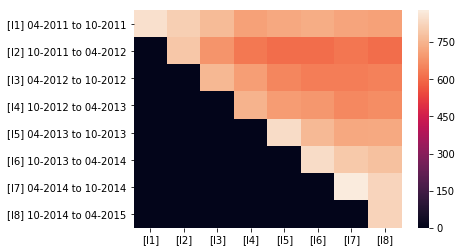

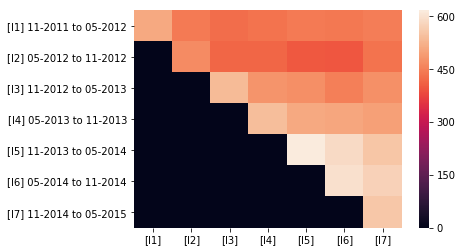

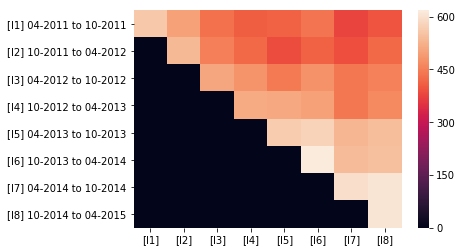

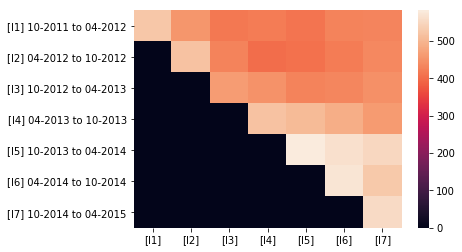

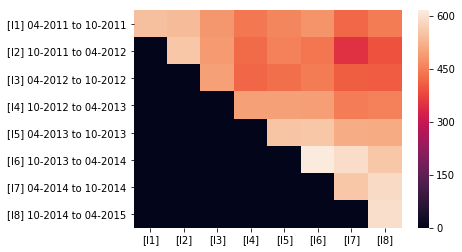

In [72]:
[draw_heatmap(allchi2[i][0].pivot(columns='test_interval', index='train_interval', values='num_of_h0').fillna(0)) for i in range(5)]

In [47]:
for i in range(5):
    allchi2[i][0].to_csv('allchi2_'+str(i)+'.csv')

# RQ2: Does time have an influence on the quality of the models?
To answer this question, we are going to analyse the evolution of model performance using the first two strategies (new models each time and updating a model that includes all information):

In [163]:
from experiments import run_experiment_classifier, run_experiment_classifier_voting, run_experiment_classifier_y, shape_summary
from splitters import NumberCaseSplit

# Utilities for experiments


def launch_experiment(months_size, months_freq, months_test, datasets=range(0,5)):
    summary_X = [None] * 5
    summary_X_V = [None] * 5
    summary_X_F = [None] * 5
    for i in datasets:
        tcs = TimeCaseSplit(train_size=pd.DateOffset(months=months_size), train_freq=pd.DateOffset(months=months_freq), test_freq=pd.DateOffset(months=months_test), test_periods=14, threshold=100, sliding=True)
        tcsV = TimeCaseSplit(train_size=pd.DateOffset(months=months_size), train_freq=pd.DateOffset(months=months_freq), test_freq=pd.DateOffset(months=months_test), test_periods=14, threshold=100, sliding=True)
        tcsF = TimeCaseSplit(train_size=pd.DateOffset(months=months_size), train_freq=pd.DateOffset(months=months_freq), test_freq=pd.DateOffset(months=months_test), test_periods=14, threshold=100, sliding=False)
        summary_X[i]= run_experiment_classifier(X[i], ~y[i], tcs.split(X[i],y[i],logs[i].df[logs[i].id_column], logs[i].df[logs[i].timestamp_column]))
        summary_X_F[i] = run_experiment_classifier(X[i], ~y[i], tcsF.split(X[i],y[i],logs[i].df[logs[i].id_column], logs[i].df[logs[i].timestamp_column]))
        summary_X_V[i] = run_experiment_classifier_voting(X[i], ~y[i], tcsV.split(X[i],y[i],logs[i].df[logs[i].id_column], logs[i].df[logs[i].timestamp_column]))
        
    return summary_X, summary_X_V, summary_X_F

def launch_experiment_rolling(size, freq, window, steps, datasets=range(0,5)):
    summary_X = [None] * 5
    summary_X_F = [None] * 5
    for i in datasets:
        tcs = NumberCaseSplit(train_size=size, train_freq=freq, sliding=True)
        tcsF = NumberCaseSplit(train_size=size, train_freq=freq, sliding=False)
        summary_X[i]= run_experiment_classifier_y(X_t[i], ~y_t[i], tcs.split(X_t[i],y_t[i],logs[i].df[logs[i].id_column], logs[i].df[logs[i].timestamp_column]),window, steps, verbose=True, summary_class=False)
        summary_X_F[i] = run_experiment_classifier_y(X_t[i], ~y_t[i], tcsF.split(X_t[i],y_t[i],logs[i].df[logs[i].id_column], logs[i].df[logs[i].timestamp_column]),window, steps, verbose=True)
        
    return summary_X, summary_X_F


def launch_experiment_number(size, freq, test, datasets=range(0,5)):
    summary_X = [None] * 5
    summary_X_V = [None] * 5
    summary_X_F = [None] * 5
    summary_X_S = [None] * 5

    for i in datasets:
        tcs = NumberCaseSplit(train_size=size, train_freq=freq, test_freq=test, test_periods=20, sliding=True)
        tcsV = NumberCaseSplit(train_size=size, train_freq=freq, test_freq=test, test_periods=20, sliding=True)
        tcsF = NumberCaseSplit(train_size=size, train_freq=freq, test_freq=test, test_periods=20, sliding=False)
        tcsS = NumberCaseSplit(train_size=size, train_freq=freq, test_freq=test, test_periods=20, sliding=False, sampling=True)
        summary_X[i]= run_experiment_classifier(X[i], ~y[i], tcs.split(X[i],y[i],logs[i].df[logs[i].id_column], logs[i].df[logs[i].timestamp_column]))
        summary_X_F[i] = run_experiment_classifier(X[i], ~y[i], tcsF.split(X[i],y[i],logs[i].df[logs[i].id_column], logs[i].df[logs[i].timestamp_column]))
        summary_X_V[i] = run_experiment_classifier_voting(X[i], ~y[i], tcsV.split(X[i],y[i],logs[i].df[logs[i].id_column], logs[i].df[logs[i].timestamp_column]))
        summary_X_S[i] = run_experiment_classifier(X[i], ~y[i], tcsS.split(X[i],y[i],logs[i].df[logs[i].id_column], logs[i].df[logs[i].timestamp_column]))
        
    return summary_X, summary_X_V, summary_X_F, summary_X_S



In [53]:
summary_999 = launch_experiment(9,9,9)

In [118]:
summary_666 = launch_experiment(6,6,6)

In [62]:
summary_300150150 = launch_experiment_number(300, 150, 150)

Sampling from: 300 in 1
Sampling from: 450 in 2
Sampling from: 600 in 3
Sampling from: 750 in 4
Sampling from: 900 in 5
Sampling from: 1050 in 6
Sampling from: 1198 in 7
Sampling from: 300 in 1
Sampling from: 450 in 2
Sampling from: 600 in 3
Sampling from: 750 in 4
Sampling from: 831 in 5
Sampling from: 300 in 1
Sampling from: 450 in 2
Sampling from: 600 in 3
Sampling from: 750 in 4
Sampling from: 900 in 5
Sampling from: 1050 in 6
Sampling from: 1200 in 7
Sampling from: 1350 in 8
Sampling from: 1408 in 9
Sampling from: 300 in 1
Sampling from: 450 in 2
Sampling from: 600 in 3
Sampling from: 750 in 4
Sampling from: 900 in 5
Sampling from: 1050 in 6
Sampling from: 1052 in 7
Sampling from: 300 in 1
Sampling from: 450 in 2
Sampling from: 600 in 3
Sampling from: 750 in 4
Sampling from: 900 in 5
Sampling from: 1050 in 6
Sampling from: 1155 in 7


These are the heatmaps for strategy non-cummulative for each of the 5 datasets

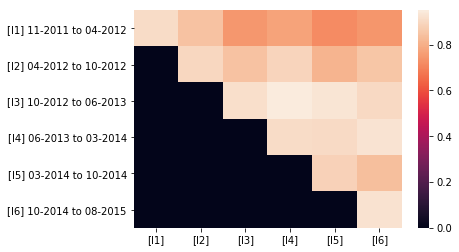

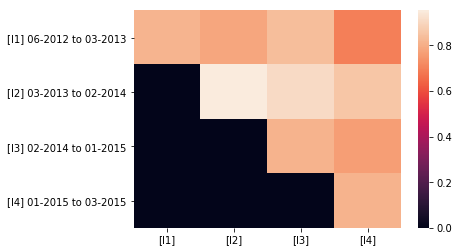

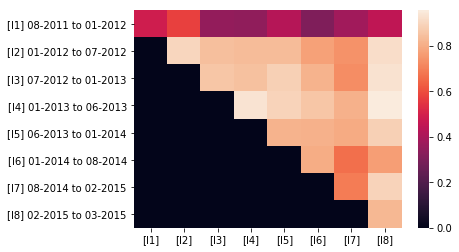

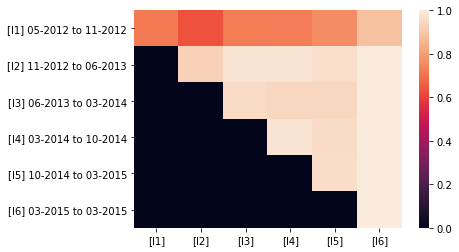

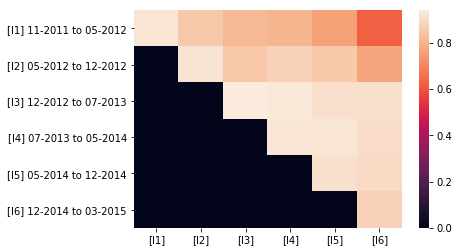

In [198]:
[draw_heatmap(shape_summary(summary_300150150[0][i]).xs('f1-score', axis=1, drop_level=True).fillna(0)) for i in range(5)]

And these are the heatmaps for strategy cummulative for the 5 datasets

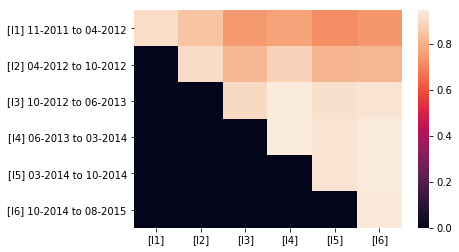

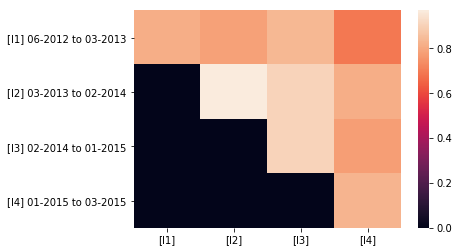

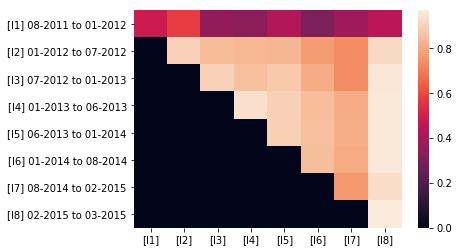

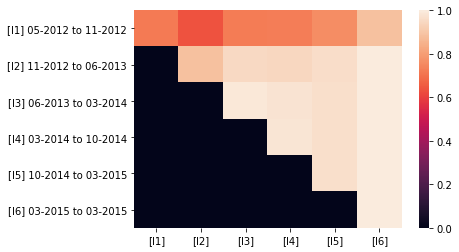

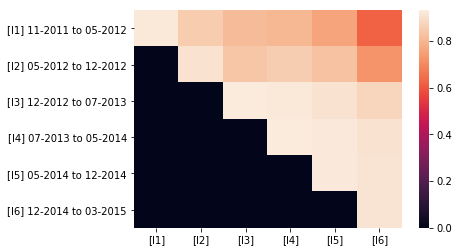

In [199]:
[draw_heatmap(shape_summary(summary_300150150[1][i]).xs('f1-score', axis=1, drop_level=True).fillna(0)) for i in range(5)]

# RQ3: How does the different update strategies compare against each other?

Finally, we compute execute the experiment for all types of strategies. The final value is the mean of the F-Scores in the diagonal of the matrix obtained.

In [172]:
def extract_values(summary, step = 0):
    mask = summary[0].sort_values(['train','test']).groupby('train').cumcount() <= step
    return pd.concat([summary[i][mask]['f1-score'] for i in range(len(summary))],axis=1)

In [181]:
summary_300_fscore = [None]*5
summary_300_fscore = [extract_values([summary_300150150[i][j] for i in range(4)]) for j in range(5)]

for i in range(5):
    summary_300_fscore[i].columns = ['X','V','F','S']


In [191]:
pd.concat([summary_300_fscore[i].mean() for i in range(5)], axis=1)

,0,1,2,3,4
X,0.907668,0.849116,0.790268,0.925582,0.915899
V,0.921329,0.881576,0.840622,0.925150,0.921801
F,0.900652,0.907067,0.815853,0.905460,0.913034
S,0.908680,0.849492,0.756128,0.890478,0.915416


Here, we use the T-test related to check whether there is a significant difference between each column. The result is that only the difference between 'V' and 'X is statistically significant.

In [201]:
from scipy import stats
[(d,i,j,stats.ttest_rel(summary_300_fscore[d][i], summary_300_fscore[d][j])) for d in range(5) for ii,i in enumerate(summary_300_fscore[d].columns) for jj,j in enumerate(summary_300_fscore[d].columns) if i < j]

[(0,
  'V',
  'X',
  Ttest_relResult(statistic=1.5492403116193034, pvalue=0.18200984423541863)),
 (0,
  'F',
  'X',
  Ttest_relResult(statistic=-0.6460089737628508, pvalue=0.5467487967610757)),
 (0,
  'F',
  'V',
  Ttest_relResult(statistic=-2.5895525535869384, pvalue=0.0488633218449456)),
 (0,
  'F',
  'S',
  Ttest_relResult(statistic=-0.7885967170573052, pvalue=0.46607539476355414)),
 (0,
  'S',
  'X',
  Ttest_relResult(statistic=0.11293387739880535, pvalue=0.914477130783393)),
 (0,
  'S',
  'V',
  Ttest_relResult(statistic=-2.5876788186249264, pvalue=0.04897432130575175)),
 (1,
  'V',
  'X',
  Ttest_relResult(statistic=1.5030058246158124, pvalue=0.22986360205007353)),
 (1,
  'F',
  'X',
  Ttest_relResult(statistic=1.6726158153227522, pvalue=0.19299635241100918)),
 (1,
  'F',
  'V',
  Ttest_relResult(statistic=0.9572703888684264, pvalue=0.40905085528986734)),
 (1,
  'F',
  'S',
  Ttest_relResult(statistic=2.505523942804531, pvalue=0.08728079183946673)),
 (1,
  'S',
  'X',
  Ttest_rel